<a href="https://colab.research.google.com/github/nidhimath/moneyReader/blob/master/source/model/Filters/explore_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage
from skimage import feature
from scipy import signal
from skimage import io
from skimage.filters import gaussian
from skimage.transform import rescale
from skimage.feature import corner_harris

import cv2 as cv

dollar_file = "skull.jpeg"

dollar = io.imread(dollar_file, as_gray=True)

#dollar = rescale(dollar, 0.5, anti_aliasing=True)
dollar = skimage.img_as_float32(dollar)

io.imsave('skull.jpg', dollar)

These are the different filters

In [ ]:
# filter 1: box filter(blurs image)
filt1 = np.ones((5,5))*1/25

mystery = scipy.signal.signaltools.correlate2d(dollar, filt1)
mystery = (mystery - np.min(mystery))/(np.max(mystery) - np.min(mystery))

io.imsave("f1_dollar.jpg", mystery)

In [ ]:
# filter 1.5: identity filter(kind of)
filt15 = np.zeros((5, 5))
filt15[2][2] = 1 

In [ ]:
# filter 2: Contrast filter(brings out smaller details)
filt2 = np.array([[-1/9, -1/9, -1/9],
                  [-1/9, 10 - 1/9, -1/9],
                  [-1/9, -1/9, -1/9]])

mystery = scipy.signal.signaltools.correlate2d(dollar, filt2)
mystery = (mystery - np.min(mystery))/(np.max(mystery) - np.min(mystery))

io.imsave("f2_dollar.jpg", mystery) 

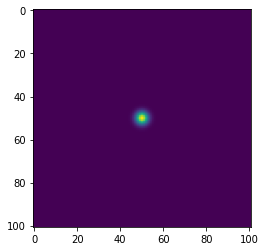

In [ ]:
# filter 3: Gaussian Filter
filt3 = np.zeros((101,101))
filt3[50][50] = 1
filt3 = gaussian(filt3, sigma=2)

plt.imshow(filt3)
plt.show()

mystery = scipy.signal.signaltools.correlate2d(dollar, filt3)
mystery = (mystery - np.min(mystery))/(np.max(mystery) - np.min(mystery))

io.imsave("f3_dollar.jpg", mystery) 

In [ ]:
# Filter 4: Sobel Kernel Horizontal(Makes the Textured Feel)

filt4 = np.array([[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])

mystery = scipy.signal.signaltools.correlate2d(dollar, filt4)
mystery = (mystery - np.min(mystery))/(np.max(mystery) - np.min(mystery))

io.imsave("f4_dollar.jpg", mystery) 

In [ ]:
# Filter 5: Sobel Kernel Vertical(Makes the Textured Feel)

filt5 = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])

In [ ]:
mystery = scipy.signal.signaltools.correlate2d(dollar, filt5)
mystery = (mystery - np.min(mystery))/(np.max(mystery) - np.min(mystery))

io.imsave("f5_dollar.jpg", mystery) 

## Edge Detection Filters


In [ ]:
# Filter 6: Sobel Kernel Both Horizontal and Vertical(Makes the Textured Feel)

mystery = scipy.signal.signaltools.correlate2d(dollar, filt4)
mystery = (mystery - np.min(mystery))/(np.max(mystery) - np.min(mystery))

mystery2 = scipy.signal.signaltools.correlate2d(dollar, filt5)
mystery2 = (mystery2 - np.min(mystery2))/(np.max(mystery2) - np.min(mystery2))

mystery3 = np.sqrt(mystery2**2 + mystery**2)

io.imsave("f6_dollar.jpg", mystery3) 

In [ ]:
# Filter 7: Sobel Extra
filt7 = skimage.filters.sobel(dollar)
io.imsave("f7_dollar.jpg", skimage.img_as_ubyte(filt7)) 

In [ ]:
# Filter 8: Canny Filter

filt8 = skimage.feature.canny(dollar, sigma=1)

mystery = scipy.signal.signaltools.correlate2d(dollar, filt8)
mystery = (mystery - np.min(mystery))/(np.max(mystery) - np.min(mystery))

io.imsave("f8_dollar.jpg", mystery) 

In [ ]:
sp_dollar = skimage.util.random_noise(dollar, "s&p")

In [ ]:
sp_blurred = scipy.signal.signaltools.correlate2d(sp_dollar, filt1)
io.imsave("sp_dollar_blurred.jpg", sp_blurred)

In [ ]:
med_plant = skimage.filters.median(sp_dollar)
io.imsave("sp_dollar_median.jpg", med_plant)

## Corner Detection

In [ ]:
Hrr, Hrc, Hcc = skimage.feature.hessian_matrix(dollar)
plt.imshow(Hrc, cmap="gray")

In [ ]:
#blurred = skimage.filters.gaussian(dollar, sigma=0.1)
harris_im = skimage.feature.corner_harris(dollar)
io.imsave("corner_harris_im.jpg", harris_im)
plt.imshow(harris_im, cmap="gray")

In [ ]:
peaks_im = skimage.feature.corner_peaks(dollar)
io.imsave("corner_peaks_im.jpg", peaks_im)
plt.imshow(peaks_im, cmap="gray")

In [ ]:
image = cv.imread("googlechrome.jpg", cv.IMREAD_GRAYSCALE)
#image2 = cv.imread("dollar2.png", cv.IMREAD_GRAYSCALE)

In [ ]:
kaze = cv.AKAZE_create()
kps, descs = kaze.detectAndCompute(dollar, image)

In [ ]:
for i in range (0,5):
  print(kps[i].pt)
  print(kps[i].size)

(544.84765625, 35.898536682128906)
4.800000190734863
(574.177490234375, 36.179222106933594)
4.800000190734863
(521.303466796875, 36.87872314453125)
4.800000190734863
(509.96893310546875, 38.29519271850586)
4.800000190734863
(590.3525390625, 38.76235580444336)
4.800000190734863


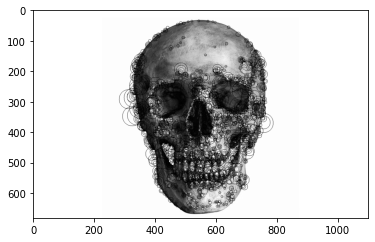

In [ ]:
def draw_kps(im, kps, col, th):
  for kp in kps:
    x = np.int(kp.pt[0])
    y = np.int(kp.pt[1])
    size = np.int(kp.size)
    cv.circle(im, (x, y), size, col, thickness=th, lineType=8, shift=0)
    plt.imshow(im, cmap="gray")
  return im

im_circles = draw_kps(dollar.copy(), kps, (0, 255, 0), 1)
plt.show()